# Linear Regression

In given task we have to predict the percentage of marks expected by the student based upon the number of hours they studied.In this task only two variables are involved.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Check out the Data

In [2]:
data1 = pd.read_csv('student_scores - student_scores.csv')
print("Data imported sucessfully")
data1.head()

Data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


# Data Visualization

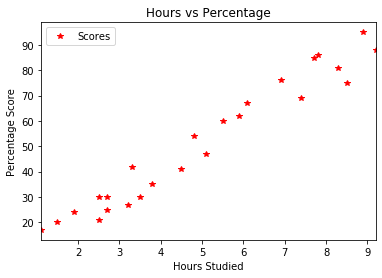

In [5]:
# Plotting the distribution of scores
data1.plot(x='Hours', y='Scores', style='*',color="red")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [7]:
X=data1.iloc[:,:-1].values
y=data1.iloc[:,1].values
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=0)

# Creating and Training the Model

In [8]:
li_reg = LinearRegression()  
li_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print('Coefficients: \n', li_reg.coef_)

Coefficients: 
 [9.91065648]


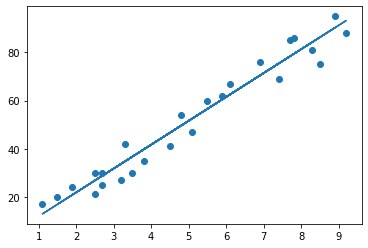

In [11]:
line = li_reg.coef_*X+li_reg.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [12]:
print(X_test)
y_predict = li_reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


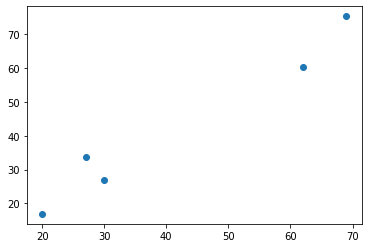

In [13]:
plt.scatter(y_test,y_predict)

# Checking the accuracy scores for training and test set

In [14]:
print('Test Score :',li_reg.score(X_test, y_test))
print('Training Score :',li_reg.score(X_train, y_train))

Test Score : 0.9454906892105355
Training Score : 0.9515510725211553


In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
# test with your own data
print('Score of student who studied for 9.25 hours a day', li_reg.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [93.69173249]


# Regression Evaluation Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
Mean Squared Error (MSE) is the mean of the squared errors.
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [17]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error (MAE): 4.183859899002975
Mean Squared Error (MSE): 21.598769307217406
Root Mean Squared Error (RMSE): 4.647447612100367
